# Lecture 10A - Review

We will begin soon! Until then, feel free to use the chat to socialize, and enjoy the music!

<img src="images/viz.jpg" width=50% style="margin-left:auto; margin-right:auto">


<div align = "left"> 
    <br>
    <br>
    Photo by <a href="https://www.pexels.com/@rodnae-prod">RODNAE Productions</a> from <a href="https://www.pexels.com/photo/magnifying-glass-on-white-paper-7948038/">Pexels</a>
</div>

<div align = "right"> 
    Firas Moosvi
</div>

## Class Outline

1. Review (30 mins)

2. Project Student hours (20 mins)

## DATA 301 Review

## Review Session Outline

Here's a summary of what you requested I review in the last learning log:
<img src="images/review_requests.png">

Overwhelmingly, it was about `seaborn` visualizations!



1. Complex Visualizations with `seaborn` (Most of the time today)

1. Writing For loops from scratch
    - Practice Questions

1. Writing Assert statements

1. Difference between try/except and assert

1. Defining functions in a .py file

1. Method Chaining

1. GroupBy vs. Merge

## Data and imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=2)
pokemon = pd.read_csv("https://github.com/firasm/bits/raw/master/pokemon.csv")
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45.0,49.0,49.0,65.0,65.0,45,1,False
1,2,Ivysaur,Grass,Poison,405,60.0,62.0,63.0,80.0,80.0,60,1,False
2,3,Venusaur,Grass,Poison,525,80.0,82.0,83.0,100.0,100.0,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80.0,100.0,123.0,122.0,120.0,80,1,False
4,4,Charmander,Fire,NaN,309,39.0,52.0,43.0,60.0,50.0,65,1,False


## Complex Visualizations with `seaborn`

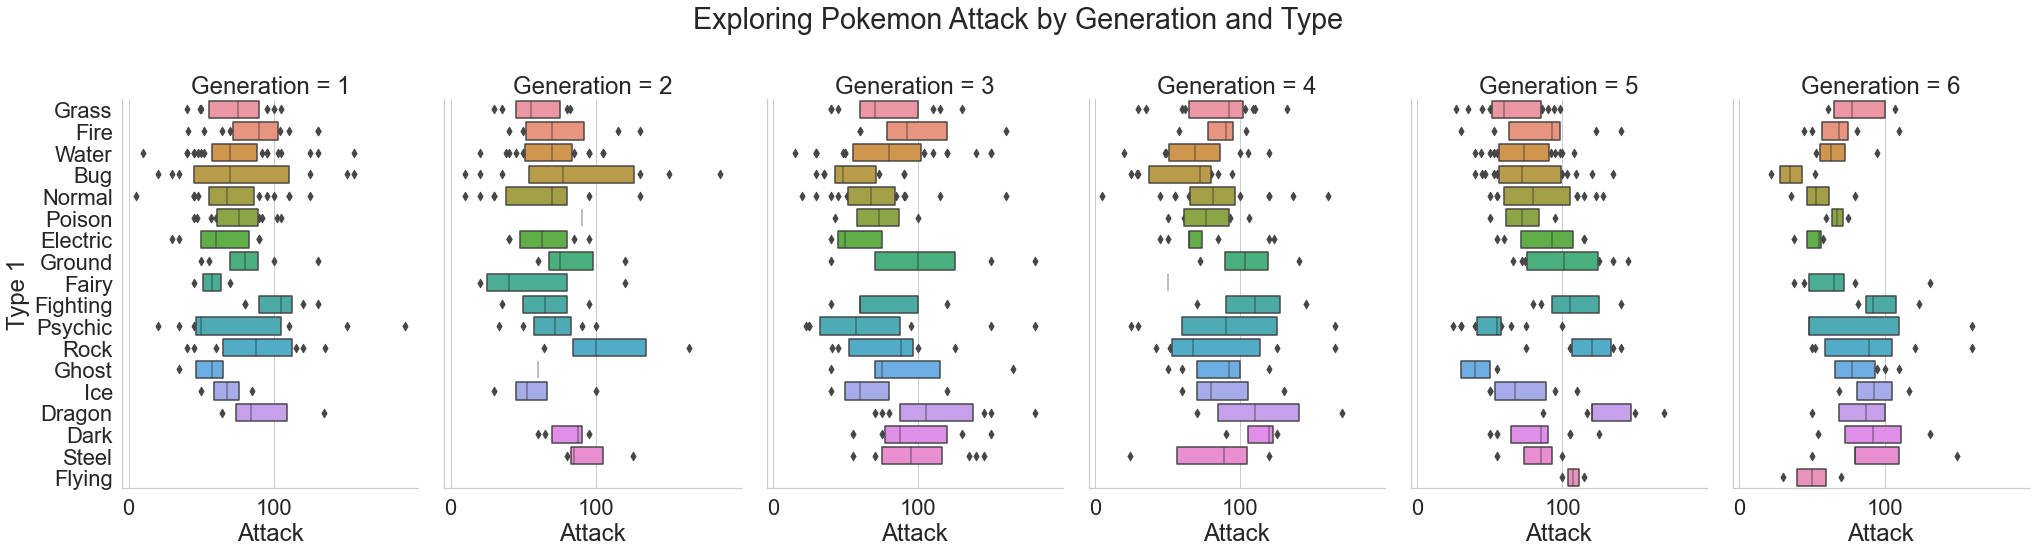

In [2]:
# Goal: Create a plot with the `pokemon` dataset to visualize Attack attribute across all generations and types

cp = sns.catplot(
    y="Type 1",
    x="Attack",
    data=pokemon,
    col="Generation",
    kind="boxen",
    height=8,
    aspect=0.6,
)
cp.fig.suptitle("Exploring Pokemon Attack by Generation and Type")
plt.tight_layout()

In [5]:
# Goal: Create a FacetGrid plot with the `pokemon` dataset across *all* attributes

# We need to do a bit of wrangling first!

pokemon2 = pokemon.melt(
    id_vars=["#", "Name", "Type 1", "Type 2", "Total", "Generation", "Legendary"]
)
pokemon2

,#,Name,Type 1,Type 2,Total,Generation,Legendary,variable,value
0,1,Bulbasaur,Grass,Poison,318,1,False,HP,45.0
1,2,Ivysaur,Grass,Poison,405,1,False,HP,60.0
2,3,Venusaur,Grass,Poison,525,1,False,HP,80.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,1,False,HP,80.0
4,4,Charmander,Fire,NaN,309,1,False,HP,39.0
...,...,...,...,...,...,...,...,...,...
4795,719,Diancie,Rock,Fairy,600,6,True,Speed,50.0
4796,719,DiancieMega Diancie,Rock,Fairy,700,6,True,Speed,110.0
4797,720,HoopaHoopa Confined,Psychic,Ghost,600,6,True,Speed,70.0
4798,720,HoopaHoopa Unbound,Psychic,Dark,680,6,True,Speed,80.0


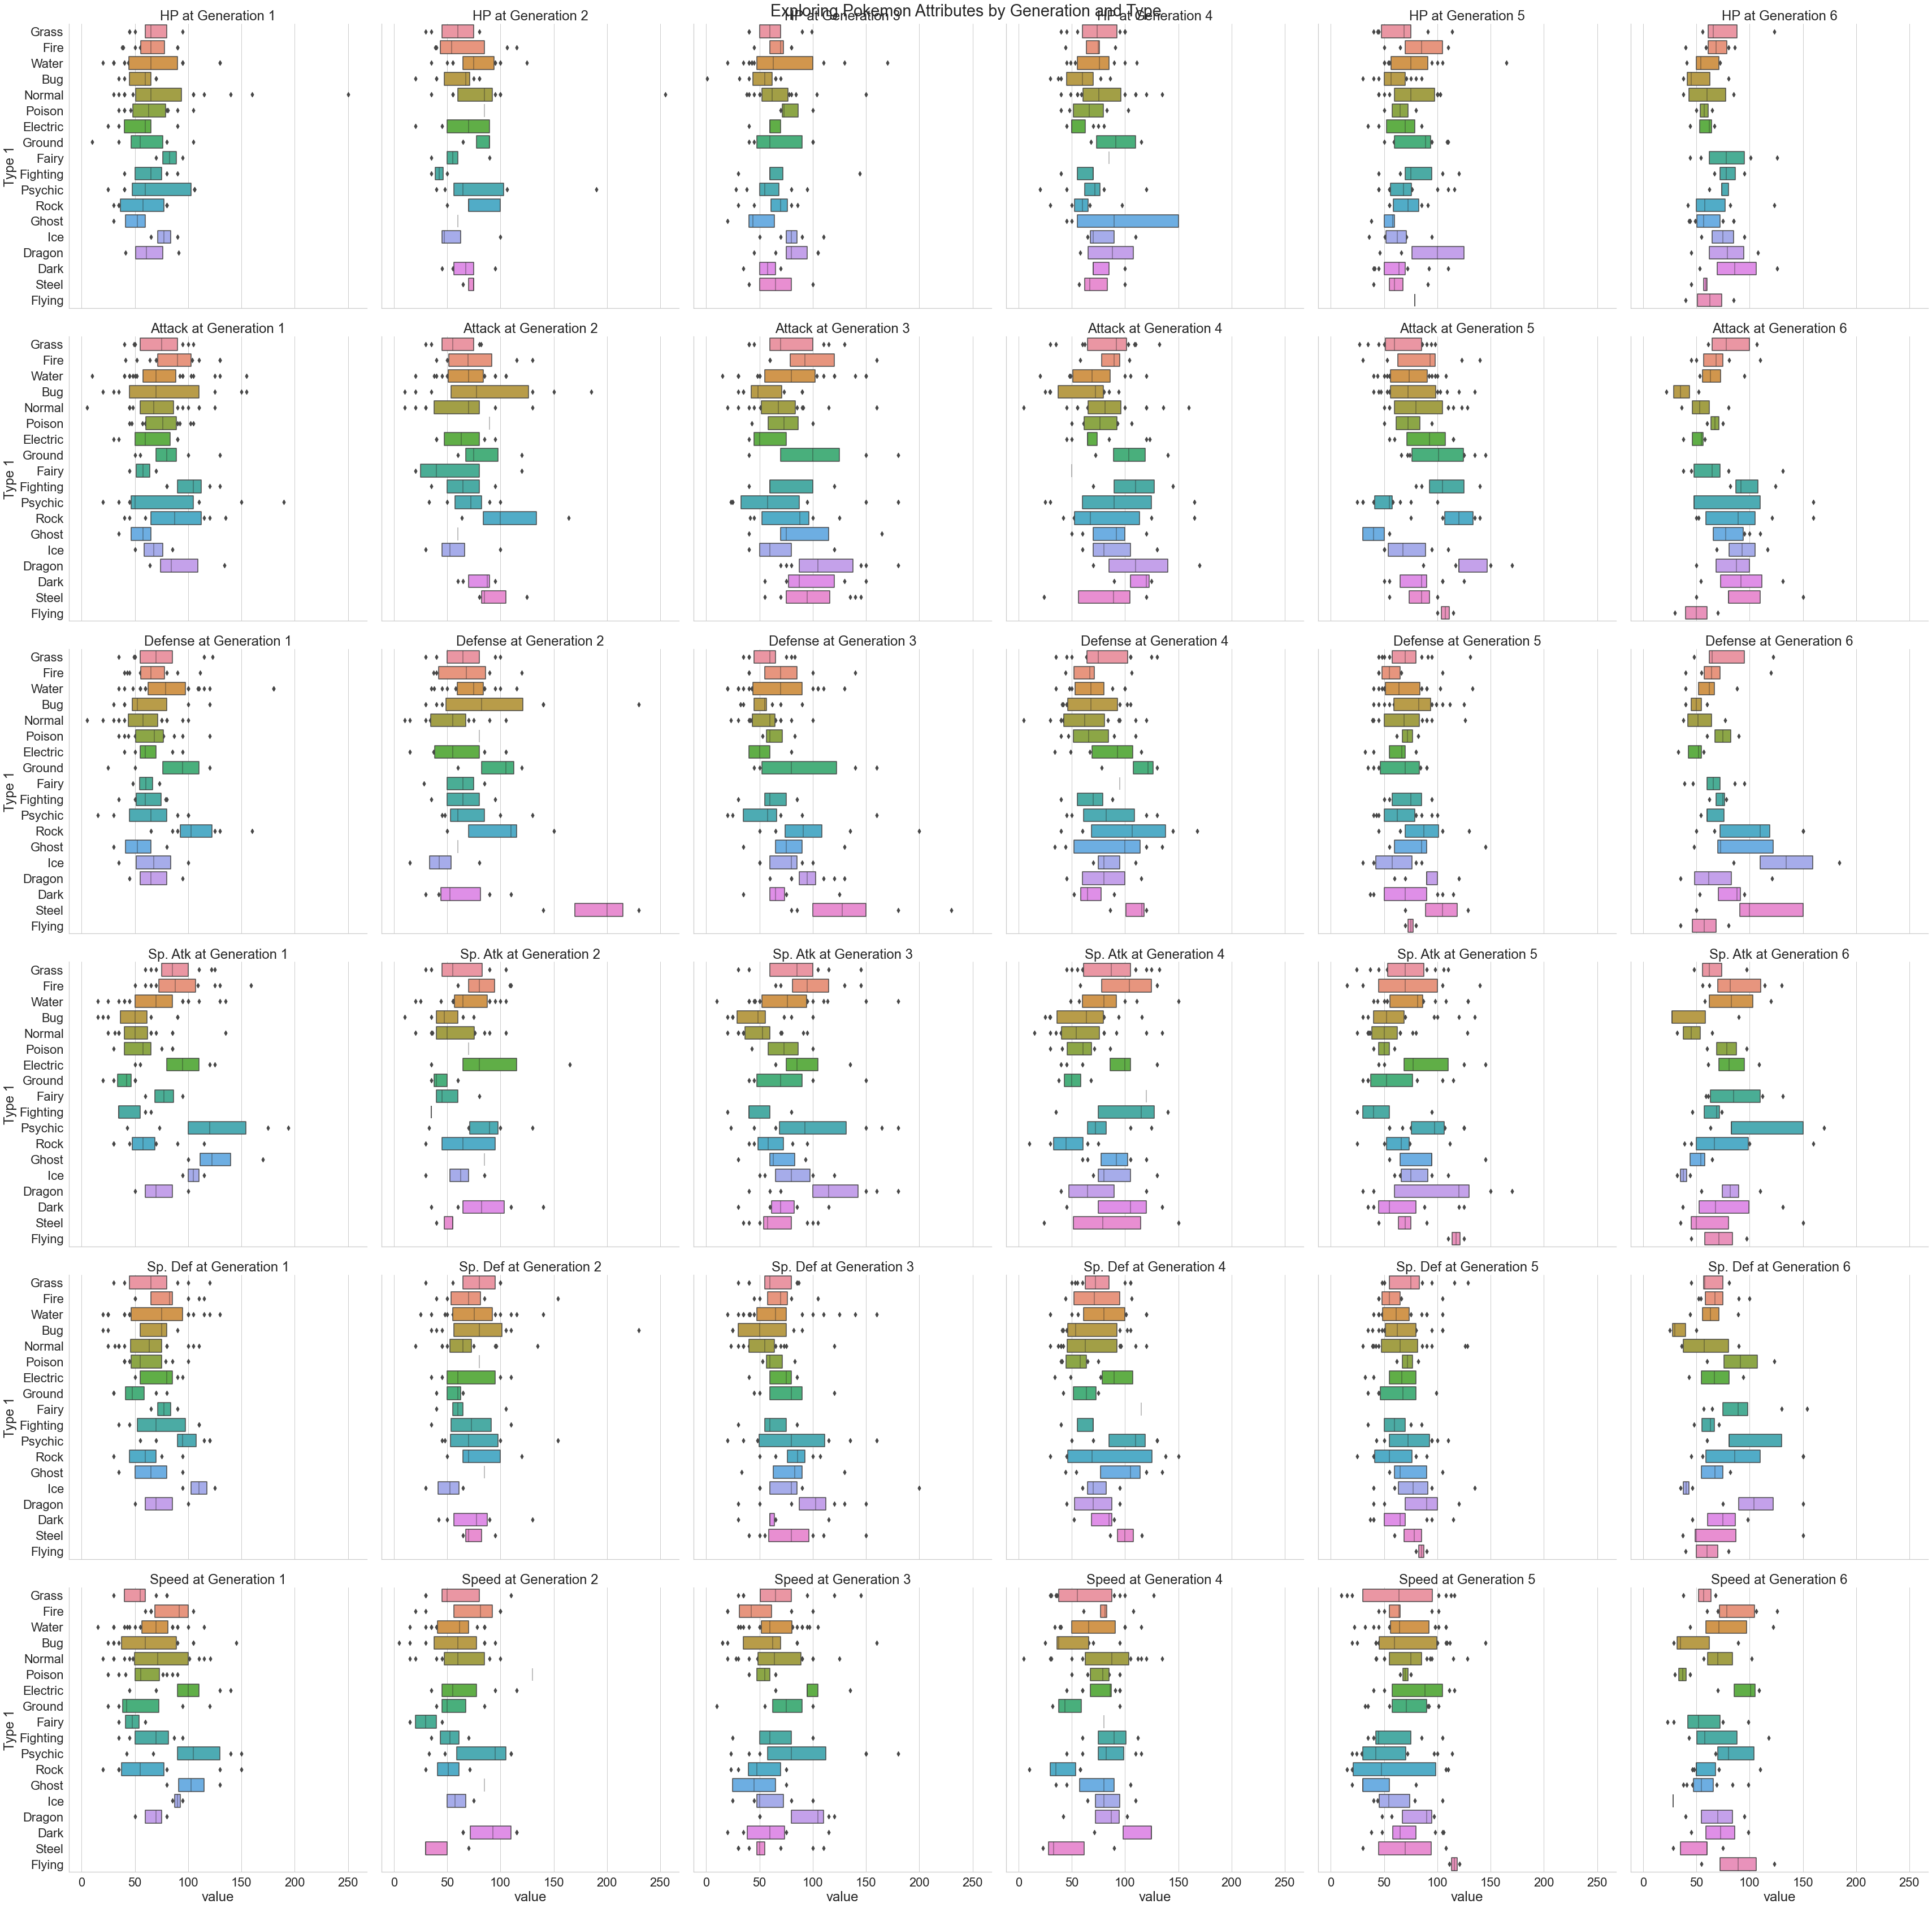

In [6]:
cp2 = sns.catplot(
    y="Type 1",
    x="value",
    data=pokemon2,
    col="Generation",
    row="variable",
    kind="boxen",
    height=8,
    aspect=1,
)
cp2.fig.suptitle("Exploring Pokemon Attributes by Generation and Type")
cp2.set_titles("{row_name} at {col_var} {col_name}")
plt.tight_layout()

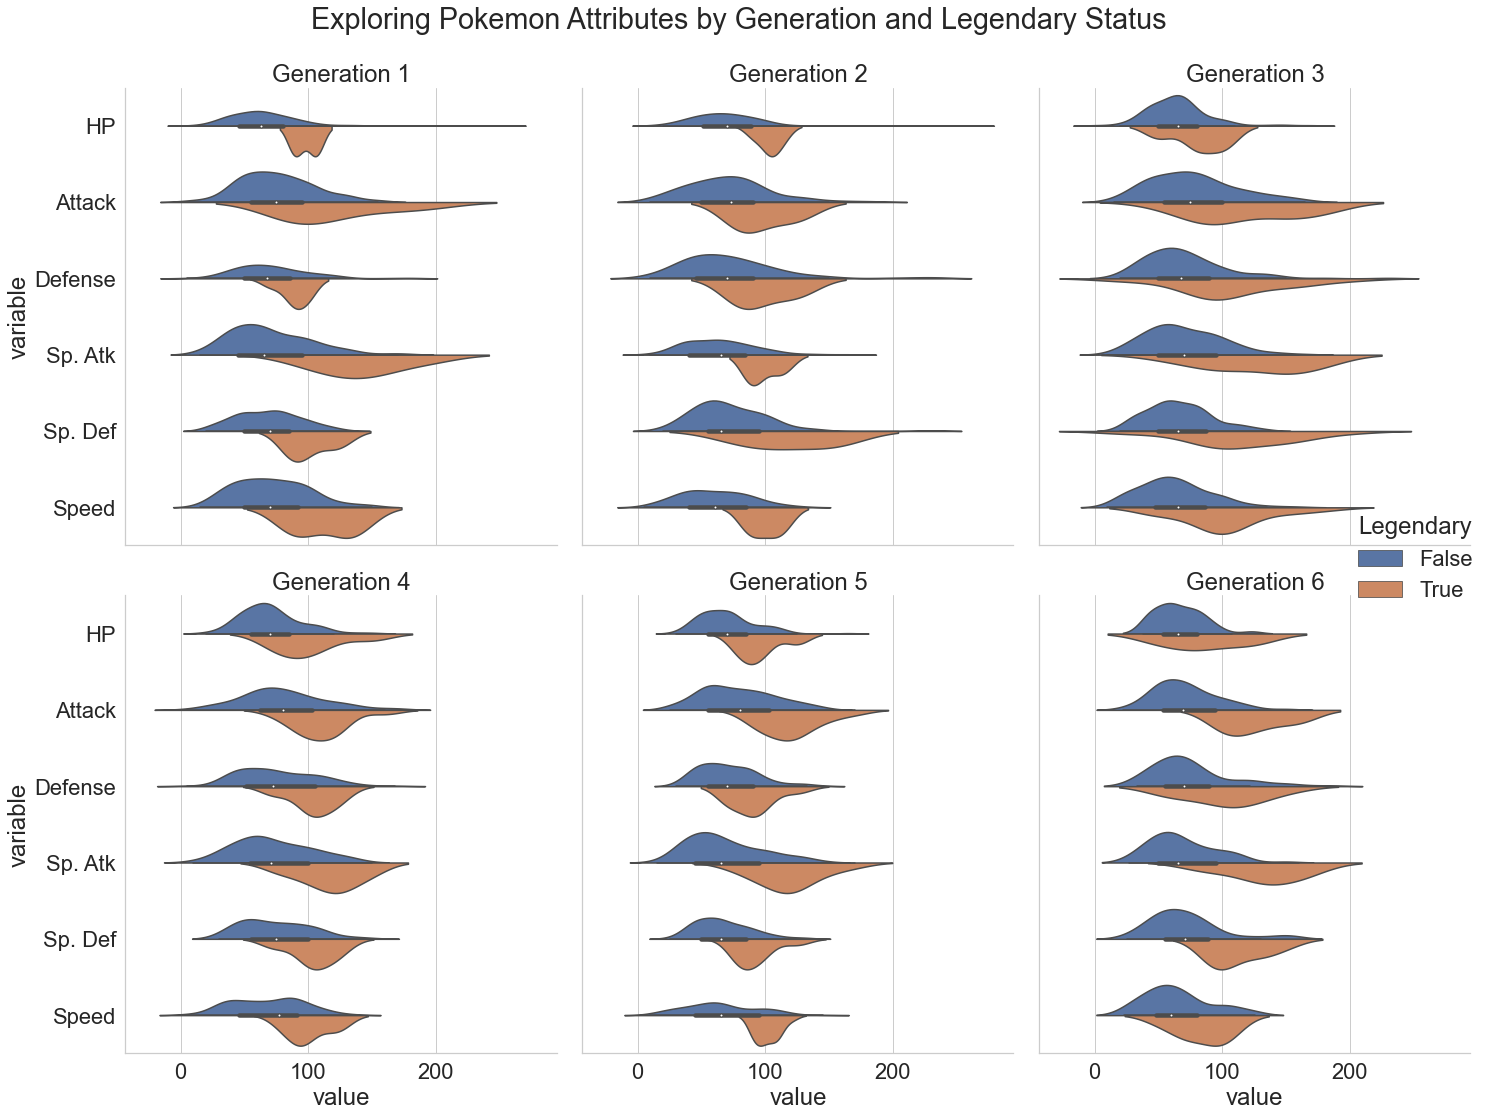

In [7]:
# Goal: Create a FacetGrid plot with the `pokemon` dataset across *all* attributes and compare legendary vs. non-legendary ignoring Type

cp3 = sns.catplot(
    x="value",
    hue="Legendary",
    data=pokemon2,
    col="Generation",
    y="variable",
    kind="violin",
    height=8,
    aspect=0.8,
    split=True,
    col_wrap=3,
)
cp3.fig.suptitle("Exploring Pokemon Attributes by Generation and Legendary Status")
cp3.set_titles("{col_var} {col_name}")
plt.tight_layout()

## Method Chaining

In [8]:
pokemon = (
    pokemon.rename(columns={"Type 1": "t1"})
    .rename(columns={"Type 2": "t2"})
    .rename(columns={"Total": "tot"})
)

pokemon.head()

,#,Name,t1,t2,tot,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45.0,49.0,49.0,65.0,65.0,45,1,False
1,2,Ivysaur,Grass,Poison,405,60.0,62.0,63.0,80.0,80.0,60,1,False
2,3,Venusaur,Grass,Poison,525,80.0,82.0,83.0,100.0,100.0,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80.0,100.0,123.0,122.0,120.0,80,1,False
4,4,Charmander,Fire,NaN,309,39.0,52.0,43.0,60.0,50.0,65,1,False


In [9]:
pokemon = pokemon.rename(columns={"Type 1": "t1", "Type 2": "t2", "Total": "tot"})

pokemon.head()

,#,Name,t1,t2,tot,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45.0,49.0,49.0,65.0,65.0,45,1,False
1,2,Ivysaur,Grass,Poison,405,60.0,62.0,63.0,80.0,80.0,60,1,False
2,3,Venusaur,Grass,Poison,525,80.0,82.0,83.0,100.0,100.0,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80.0,100.0,123.0,122.0,120.0,80,1,False
4,4,Charmander,Fire,NaN,309,39.0,52.0,43.0,60.0,50.0,65,1,False


## Additional Review topics

We won't have time to cover these in class, but here are some notes and code for you to play around with.

### GroupBy vs. Merge

In [10]:
gb_df2 = pokemon.groupby("t1").sum().reset_index()[["t1", "tot", "HP", "Attack"]]

In [11]:
gb_df = pokemon.groupby("t1").sum()  # .reset_index()[['t1','tot','HP','Attack']]
gb_df

,#,tot,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
t1,,,,,,,,,,
Bug,23080,26146,3865.0,4872.0,4790.0,3672.0,4346.0,4256,222,0
Dark,14302,13818,2071.0,2740.0,2177.0,2314.0,2155.0,2361,125,2
Dragon,15180,17617,2666.0,3588.0,2764.0,3099.0,2843.0,2657,124,12
Electric,15994,19510,2631.0,3040.0,2917.0,3961.0,3243.0,3718,144,4
Fairy,7642,7024,1260.0,1046.0,1117.0,1335.0,1440.0,826,70,1
Fighting,9824,11244,1886.0,2613.0,1780.0,1434.0,1747.0,1784,91,0
Fire,17025,23820,3635.0,4408.0,3524.0,4627.0,3755.0,3871,167,5
Flying,2711,1940,283.0,315.0,265.0,377.0,290.0,410,22,2
Ghost,15568,14066,2062.0,2361.0,2598.0,2539.0,2447.0,2059,134,2


### Writing for loops from scratch

In [12]:
numbers = [1, 3, 4, 6, 81, 80, 100, 95]

In [13]:
# Your solution here

# Notes on how to write my for loop

# 1. loop over all numbers and print them (`for`)
# 2. write a conditional statement to see if the number is even or odd (`%2==0`)
# 3. write a conditional statement to see if the number is divisible by 5 (`%5 == 0)
# 4. add to `my_list` the appropriate string (`.append`)


# full solution

my_list = []
for i in numbers:
    if i % 5 == 0:  # checks if num is divisible by 5
        if i % 2 == 0:
            my_list.append("five even")
        else:
            my_list.append("five odd")

    elif (i % 2 == 0) and (i % 5 != 0):  # checks if num is even and NOT divisible by 5
        my_list.append("even")

    elif (i % 2 != 0) and (i % 5 != 0):  # checks if num is odd and NOT divisible by 5
        my_list.append("odd")


# point 1

# for i in numbers:
#     print(i)

# point 2

# for i in numbers:
#     if (i%2 == 0):
#         print(i,'even')
#     else:
#         print(i,'odd')

# point 3

# for i in numbers:
#     if (i%5 == 0):
#         print(i,'divisble by 5')
#     else:
#         print(i,'NOT divisble by 5')

# point 4

# my_list = []

# for i in numbers:
#     if (i%5 == 0):
#         my_list.append('divisble by 5')
#     else:
#         my_list.append('NOT divisble by 5')

# my_list

In [14]:
assert my_list == [
    "odd",
    "odd",
    "even",
    "even",
    "odd",
    "five even",
    "five even",
    "five odd",
]

### Defining functions in a .py folder

In [15]:
# first, create a .py file (NOT a .ipynb file) to add your functions

# next, import that .py file:

import my_functions as mf

# next, you can now use the functions in the .py file

mf.make_larger2(10, 4)

Don't worry, you are the best coder in the history of the coders


104

And that's it!